#  Linear Regression: Predicting the Body Mass of Penguins 
In this notebook, we implement **Linear Regression** using a custom **SingleNeuron** class with:
- Identity activation function
- Mean squared error loss

We apply it to predict the **Body Mass** of penguins based on physical features.

In this notebook, we will also:
- Explain the concept of Linear Regression
- Preprocess and explore the dataset
- Implement Linear Regression from scratch
- Visualize and evaluate the model

##  What is Linear Regression?
Linear regression models the relationship between a **dependent variable** and one or more **independent variables** using a straight line.
The equation is:
`y = w1*x1 + w2*x2 + ... + b`
The goal is to find weights `w` and bias `b` that minimize the difference between predicted and actual values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

## Load and Prepare Penguins Data

In [2]:
penguins_df = pd.read_csv("penguins.csv")
penguins_df = penguins_df.dropna()
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
target = 'body_mass_g'
X = penguins_df[features].values
y = penguins_df[target].values

In [3]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

## Explore the Data

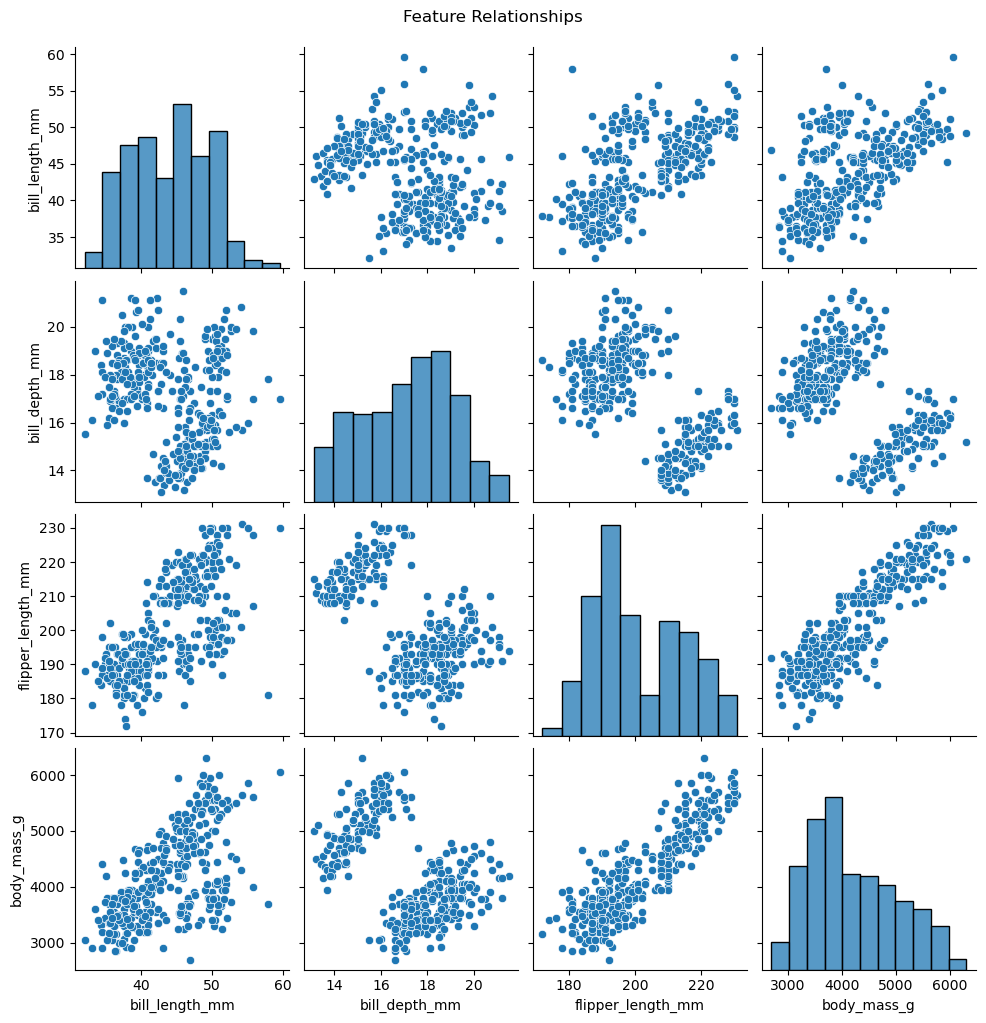

In [9]:
sns.pairplot(penguins_df, vars=features + [target])
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

##  Linear Regression Implementation: Define Single Neuron and Helpers

In [10]:
def activation(z):
    return z

def mean_squared_error_loss(y_hat, y):
    return 0.5 * (y_hat - y)**2

class SingleNeuron():
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha=0.005, epochs=50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha * error * xi
                self.w_[-1] -= alpha * error
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors / N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

In [11]:
neuron = SingleNeuron(activation, mean_squared_error_loss)
neuron.train(X_norm, y, alpha=0.01, epochs=100)
y_pred = np.array([neuron.predict(xi) for xi in X_norm])

##  Training Loss Over Epochs

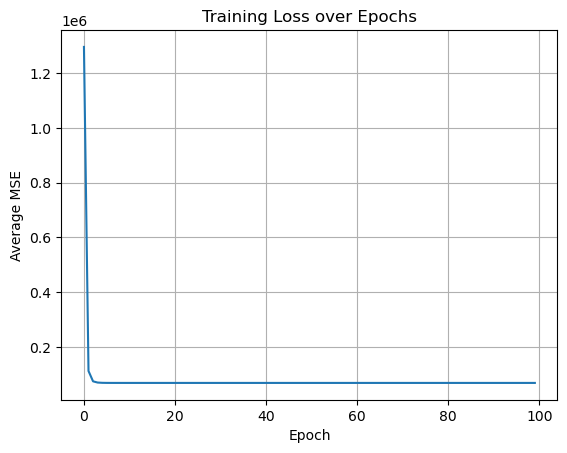

In [6]:
plt.plot(neuron.errors_)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average MSE')
plt.grid(True)
plt.show()

##  Evaluate Model Performance

In [12]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 184974.95
R² Score: 0.71


## Actual vs Predicted Plot

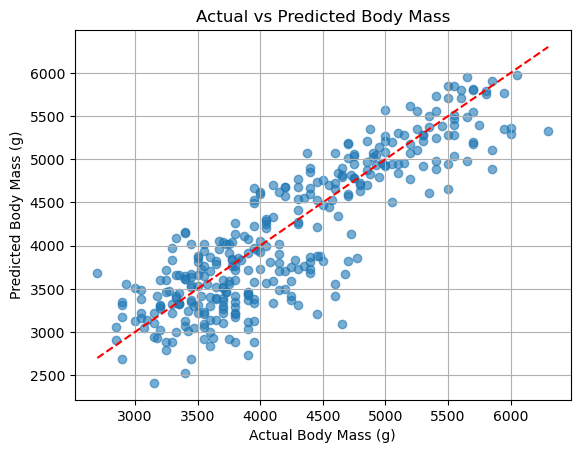

In [8]:
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Body Mass (g)')
plt.ylabel('Predicted Body Mass (g)')
plt.title('Actual vs Predicted Body Mass')
plt.grid(True)
plt.show()

## Takeaways
- We built a linear regression model using a single neuron.
- Training was done using gradient descent.
- Visualization shows good predictive performance on this dataset.